In [1]:
import DSGRN
from pychomp import *
from TransversalitySheaf import *
from ConleySheaf import *
from FlowSheaf import *
from CubicalSheaf import *

In [2]:
%run TM_BlowupGraph2.ipynb
# %run TM_LocalColoring.ipynb
# %run TM_DrawGradedComplex1.ipynb

In [3]:
def DSGRNComplex ( p ):
    p = pg.parameter(pi)
    std = BlowupGraph2(p)
    C,flow_map = std.complex(),std.diagram()
    discrete_flow = {top_cell: flow_map(top_cell) for top_cell in C(C.dimension())}
    return C, discrete_flow

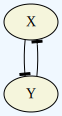

In [4]:
netspec = 'X : ~Y \n Y: ~X'
network = DSGRN.Network(netspec)
DSGRN.DrawGraph(network)

In [5]:
network = DSGRN.Network(netspec)
pg = DSGRN.ParameterGraph(network)

In [6]:
#std = BlowupGraph2(pg.parameter(4))

In [7]:
#Construct base complex
base_complex = GeometricCubicalComplex([[0,2],[0,2]],[2,2])

In [8]:
#Construct sheaf mapping
mapping = {}
B = base_complex.complex
for pi in B(0):
    C,discrete_flow = DSGRNComplex(pi)
    mapping[pi] = FlowComplex(C,discrete_flow)

In [9]:
vertex_flow_sheaf = CubicalSheaf(base_complex, mapping)

In [10]:
flow_sheaf = SheafFromVertices(vertex_flow_sheaf)

In [11]:
graded_sheaf = GradeFlowSheaf(flow_sheaf)

In [12]:
conley_sheaf = ConleySheaf(graded_sheaf)
rc_sheaf = RecurrentSheaf(conley_sheaf)

In [13]:
B = rc_sheaf.base_complex.face_poset

In [14]:
type(B)

pychomp.DirectedAcyclicGraph.DirectedAcyclicGraph

In [15]:
#B.edges()
#3 -> 12 -> 4 -> 13 -> 5

In [16]:
#path = []

In [17]:
pi = 4
GC = graded_sheaf.mapping[pi].graded_complex
cm = rc_sheaf.mapping[pi].graded_complex
poset = rc_sheaf.mapping[pi].poset

In [18]:
for cell in cm.complex():
    print(cell,cm.value(cell))

0 1
1 0
2 5
3 5
4 2
5 5


In [19]:
cm.complex().dimension()

2

In [20]:
#3 -> 12 -> 4 -> 13 -> 5
# T = rc_sheaf.mapping[(12,4)]
# for d in range(cm.complex().dimension()):
#     print('Dimension ' + str(d))
#     for cell in cm.complex()(d):
#         if cm.value(cell) != 5:
#             print(cell, T.homotopy_inv({cell}))

In [21]:
#DrawGradedComplex1(cm, poset, LocalColoring(std,gc,poset), list(poset.vertices()))    

In [22]:
pg.size()

9

In [23]:
pi = 3

In [48]:
def get_gc ( pi ):
    p = pg.parameter(pi)
    std = BlowupGraph2(p)
    dag,gc = FlowGradedComplex(std.complex(),std.diagram())
    GC = GradedComplexObj(gc,Poset(dag))
    return GC

In [49]:
GC3, GC4, GC5 = get_gc(3),get_gc(4),get_gc(5)

In [50]:
Tower3 = ConnectionMatrixTower(GC3.graded_complex)
Tower4 = ConnectionMatrixTower(GC4.graded_complex)
Tower5 = ConnectionMatrixTower(GC5.graded_complex)

In [51]:
C3 = Tower3[-1]
C4 = Tower4[-1]
C5 = Tower5[-1]

In [52]:
T34 = GradedComplexMap.induce_from_tower(Tower3,Tower4, lambda x: x)

In [53]:
T45 = GradedComplexMap.induce_from_tower(Tower4,Tower5, lambda x: x)

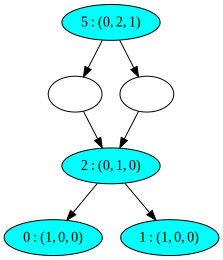

In [54]:
DrawGradedComplex(C4, GC4.poset)

In [55]:
for cell in C4.complex():
    print(cell,C4.value(cell))
    img = T45.chain_map({cell})
    print('Image:')
    for b in img:
        print(str(b) + ' value: ' + str(C5.value(b)))
    print('-----')

0 1
Image:
0 value: 0
-----
1 0
Image:
0 value: 0
-----
2 5
Image:
1 value: 5
2 value: 5
-----
3 5
Image:
1 value: 5
-----
4 2
Image:
-----
5 5
Image:
3 value: 5
-----


In [56]:
for cell in C3.complex():
    print(cell,C3.value(cell))
    img = T45.chain_map(T34.chain_map({cell}))
    print('Image:')
    for b in img:
        print(str(b) + ' value: ' + str(C5.value(b)))
    print('-----')

0 0
Image:
0 value: 0
-----
1 5
Image:
2 value: 5
-----
2 5
Image:
1 value: 5
-----
3 5
Image:
3 value: 5
-----


In [43]:
type(C3)

pychomp._chomp.GradedComplex

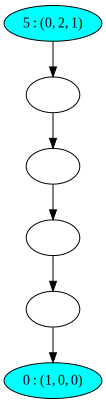

In [44]:
DrawGradedComplex(C3, GC3.poset)

In [33]:
for cell in C3.complex():
    print(cell)

0
1
2
3


In [34]:
T34.chain_map

<function pychomp.GradedComplex.GradedComplexMap.induce_from_tower.<locals>.<lambda>(x)>

In [35]:
T34 = GradedComplexMap.induce_from_value(GC3,GC4)

In [36]:
T45 = GradedComplexMap.induce_from_value(GC4,GC5)

In [37]:
T34.poset_map

<function pychomp.GradedComplex.GradedComplexMap.induce_from_value.<locals>.<lambda>(x)>

In [38]:
pi = 4
p = pg.parameter(pi)
std = BlowupGraph2(p)
dag,gc = FlowGradedComplex(std.complex(),std.diagram())
cm = ConnectionMatrix(gc)
conleyindices = cm.count()
fringenode = gc.value(std.complex().size()-1)
del conleyindices[fringenode]
CMG = InducedPoset(dag, lambda v : v in conleyindices)

In [39]:
DrawGradedComplex1(cm, CMG, LocalColoring(gc,CMG), list(CMG.vertices()))    

NameError: name 'DrawGradedComplex1' is not defined

In [ ]:
path = [3,4,5]